In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.shape

(10407, 13)

In [4]:
train_df.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [5]:
train_df.drop(columns = 'id', inplace = True)

In [6]:
train_df.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


[]

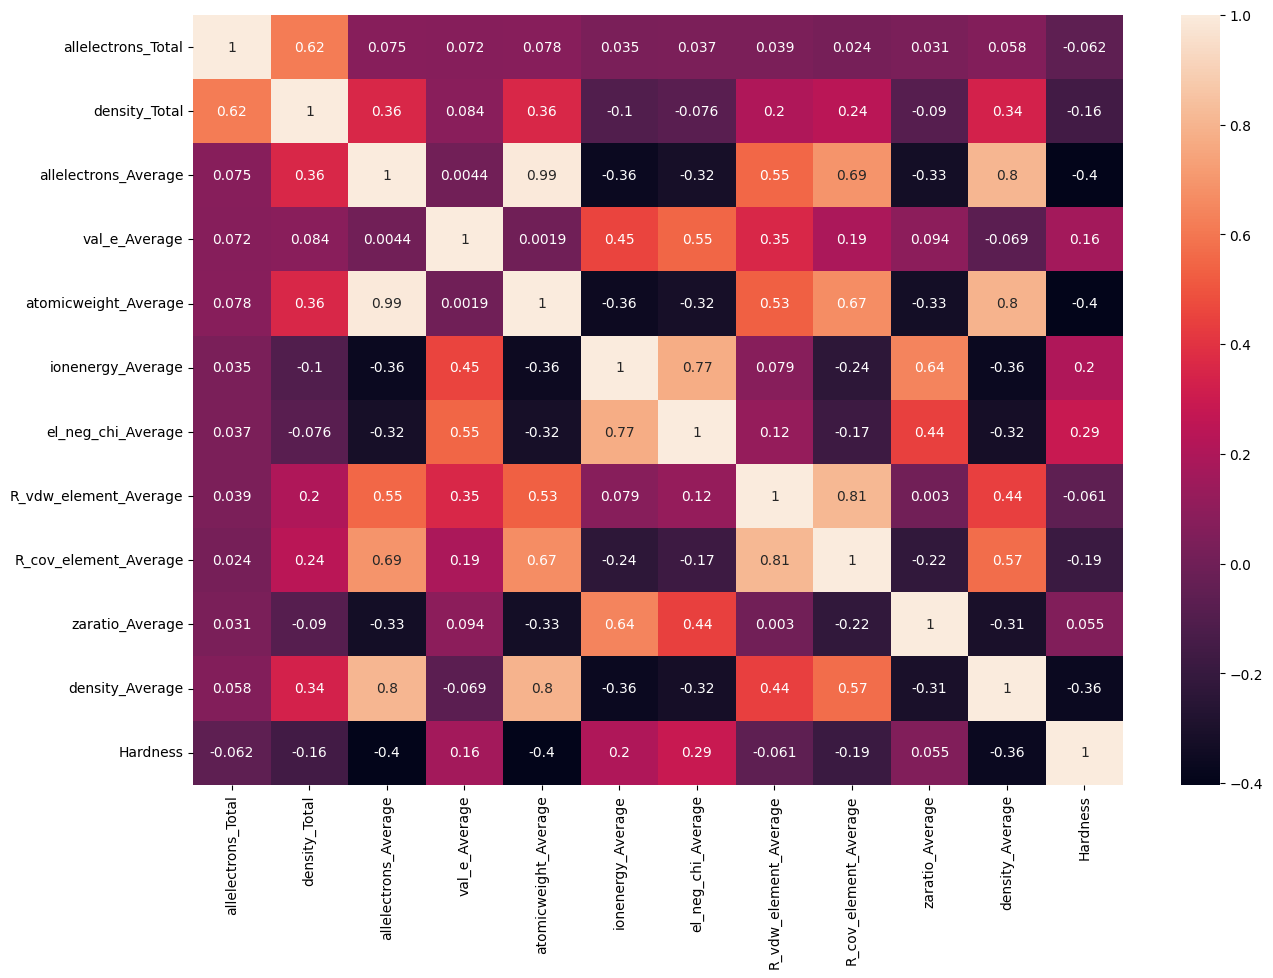

In [9]:
corr = train_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.plot()

In [13]:
train_df.drop(columns = ['allelectrons_Average', 'atomicweight_Average'], axis = 1, inplace = True)

In [14]:
train_df.head()

,allelectrons_Total,density_Total,val_e_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,4.8,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,4.8,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,5.6,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,4.8,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,4.8,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


array([[<AxesSubplot: title={'center': 'allelectrons_Total'}>,
        <AxesSubplot: title={'center': 'density_Total'}>,
        <AxesSubplot: title={'center': 'val_e_Average'}>],
       [<AxesSubplot: title={'center': 'ionenergy_Average'}>,
        <AxesSubplot: title={'center': 'el_neg_chi_Average'}>,
        <AxesSubplot: title={'center': 'R_vdw_element_Average'}>],
       [<AxesSubplot: title={'center': 'R_cov_element_Average'}>,
        <AxesSubplot: title={'center': 'zaratio_Average'}>,
        <AxesSubplot: title={'center': 'density_Average'}>],
       [<AxesSubplot: title={'center': 'Hardness'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

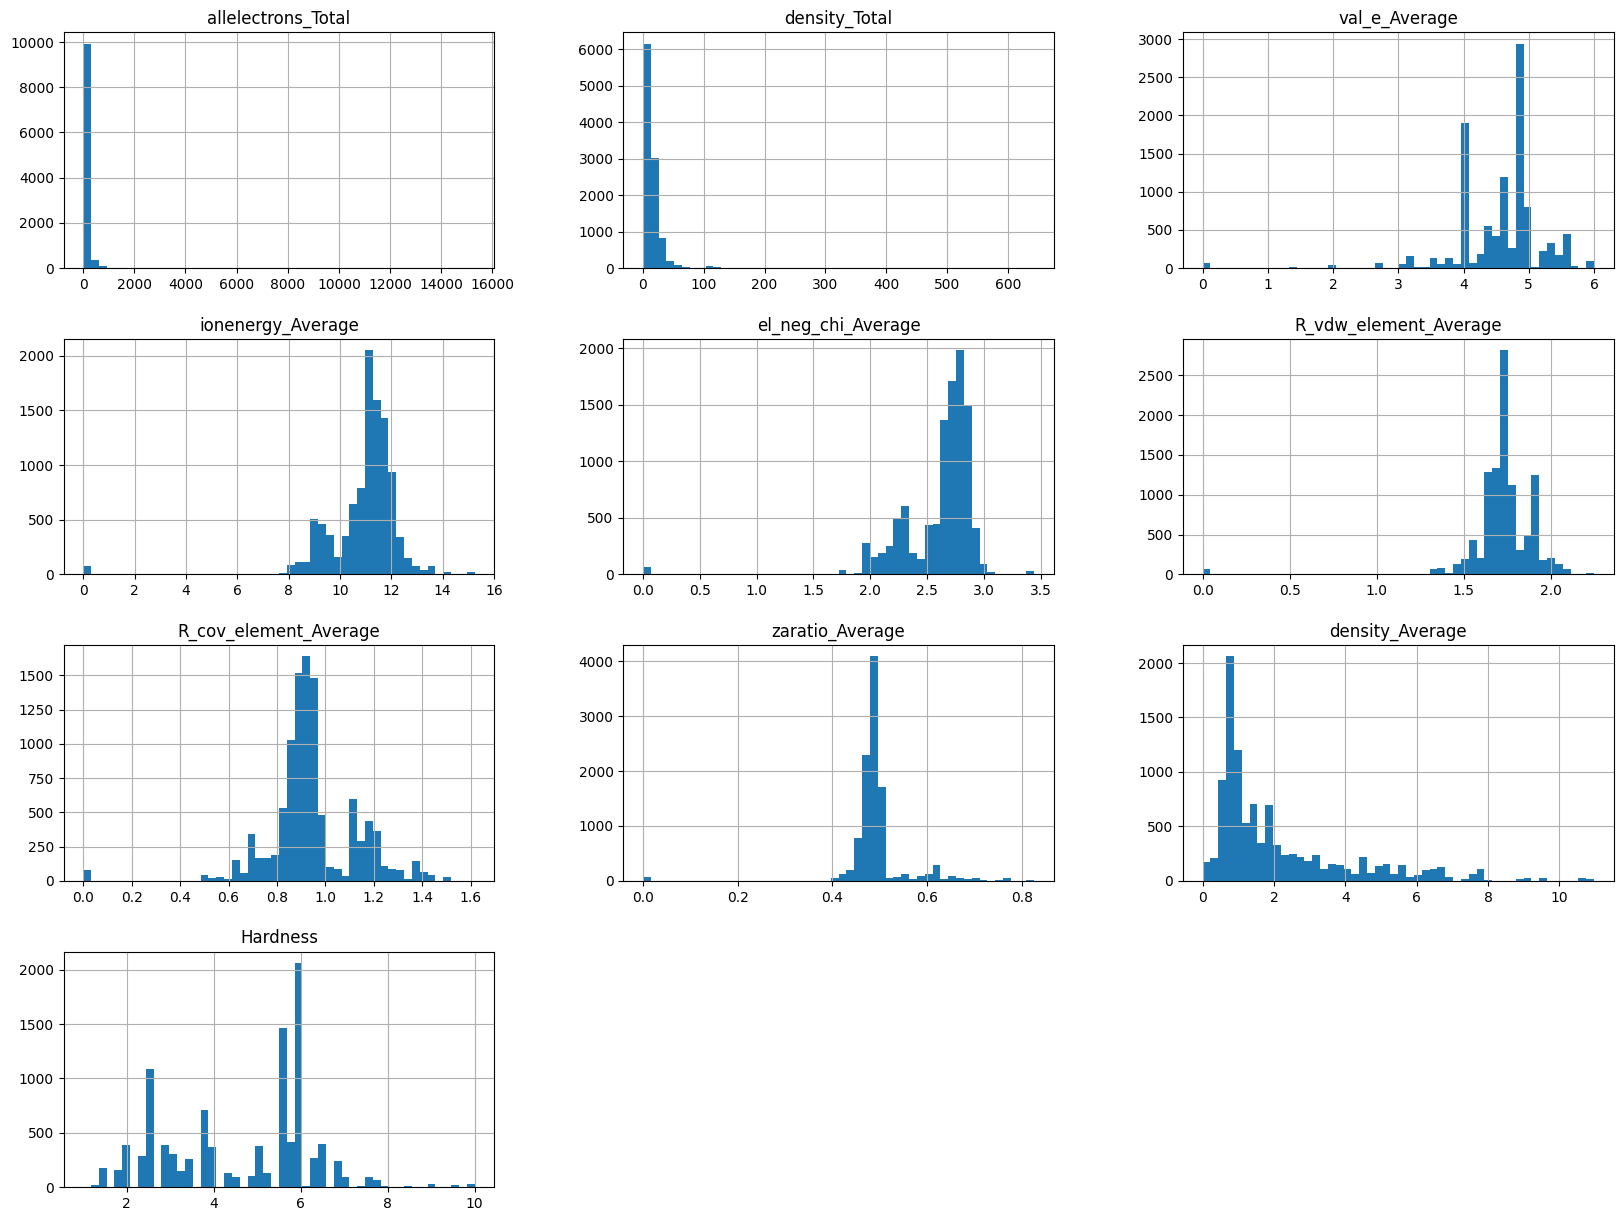

In [16]:
train_df.hist(bins = 50, figsize = (20,15))

<AxesSubplot: >

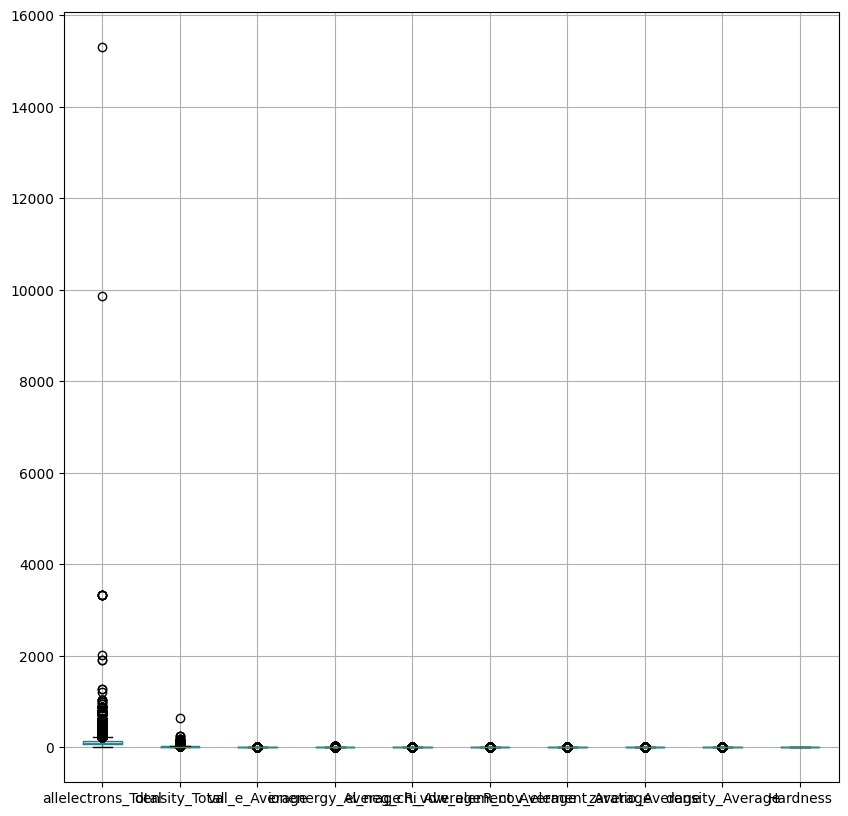

In [19]:
train_df.boxplot(figsize = (10,10))

In [23]:
q1 = train_df.quantile(0.25)
q3 = train_df.quantile(0.75)
iqr = q3 - q1

lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

In [25]:
(train_df[train_df > upper_bound]).count()

allelectrons_Total       1013
density_Total             865
val_e_Average               0
ionenergy_Average         119
el_neg_chi_Average         30
R_vdw_element_Average     352
R_cov_element_Average    1459
zaratio_Average          1063
density_Average           785
Hardness                    0
dtype: int64

In [26]:
(train_df[train_df < lower_bound]).count()

allelectrons_Total         0
density_Total              0
val_e_Average            194
ionenergy_Average        500
el_neg_chi_Average       728
R_vdw_element_Average    377
R_cov_element_Average    410
zaratio_Average          468
density_Average            0
Hardness                   0
dtype: int64

In [33]:
train_df = train_df[~((train_df < lower_bound) | (train_df > upper_bound)).any(axis=1)]

In [35]:
# outliers removed 
train_df.head()

,allelectrons_Total,density_Total,val_e_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,4.8,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,4.8,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,5.6,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,4.8,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,4.8,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [37]:
bkp2 = train_df.copy()

In [38]:
train_df.columns

Index(['allelectrons_Total', 'density_Total', 'val_e_Average',
       'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average',
       'R_cov_element_Average', 'zaratio_Average', 'density_Average',
       'Hardness'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_df.iloc[:,:-1]
y = train_df['Hardness']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5182, 9)
(1296, 9)
(5182,)
(1296,)


In [43]:
sc = StandardScaler()

In [44]:
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


from sklearn.ensemble import AdaBoostRegressor

In [49]:
from sklearn.metrics import median_absolute_error

In [52]:
models = {
    'linear_regression':LinearRegression(),
    'random_forest':RandomForestRegressor(max_depth=5,min_samples_leaf=4,random_state=0),
    'lasso':Lasso(),
    'XGBoost':XGBRegressor(learning_rate =0.1,n_estimators=600,max_depth=5),
    'CatBoost':CatBoostRegressor(random_state=42,n_estimators=300),
}
scores = ['median_abs_error']
res = np.zeros(shape=(len(models),len(scores)))

In [50]:
for i,key in enumerate(models):
    model = models[key].fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res[i,0] = median_absolute_error(y_test, y_pred)

Learning rate set to 0.141309
0:	learn: 1.4800958	total: 147ms	remaining: 43.9s
1:	learn: 1.4451861	total: 149ms	remaining: 22.2s
2:	learn: 1.4162014	total: 151ms	remaining: 15s
3:	learn: 1.3918870	total: 154ms	remaining: 11.4s
4:	learn: 1.3716480	total: 156ms	remaining: 9.2s
5:	learn: 1.3535787	total: 159ms	remaining: 7.79s
6:	learn: 1.3382598	total: 161ms	remaining: 6.76s
7:	learn: 1.3228184	total: 164ms	remaining: 5.98s
8:	learn: 1.3124668	total: 166ms	remaining: 5.37s
9:	learn: 1.3030297	total: 168ms	remaining: 4.88s
10:	learn: 1.2932163	total: 171ms	remaining: 4.48s
11:	learn: 1.2859848	total: 173ms	remaining: 4.16s
12:	learn: 1.2769761	total: 176ms	remaining: 3.88s
13:	learn: 1.2721814	total: 179ms	remaining: 3.65s
14:	learn: 1.2671750	total: 182ms	remaining: 3.46s
15:	learn: 1.2619179	total: 184ms	remaining: 3.27s
16:	learn: 1.2567237	total: 187ms	remaining: 3.11s
17:	learn: 1.2507006	total: 189ms	remaining: 2.96s
18:	learn: 1.2456336	total: 192ms	remaining: 2.83s
19:	learn: 1.2

In [51]:
print(res)

[[0.88787056]
 [0.69374678]
 [0.94090758]
 [0.67029405]
 [0.67114864]]


In [53]:
test = pd.read_csv('test.csv')

In [54]:
test.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [55]:
test.drop(columns = ['allelectrons_Average', 'atomicweight_Average'], axis = 1, inplace = True)

In [56]:
test.head()

,id,allelectrons_Total,density_Total,val_e_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,5.28,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,5.60,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,4.80,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,4.80,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,4.00,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [57]:
best_model = XGBRegressor(learning_rate =0.1,n_estimators=600,max_depth=5)

In [58]:
best_model.fit(scaled_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
y_pred = best_model.predict(test.drop(columns='id', axis = 1))

In [61]:
submission = pd.DataFrame({'id':test['id'], 'Hardness':y_pred})
submission

,id,Hardness
0,10407,1.788483
1,10408,2.343953
2,10409,2.689504
3,10410,3.220802
4,10411,2.722626
...,...,...
6934,17341,2.978751
6935,17342,1.973625
6936,17343,2.521177
6937,17344,3.100912


In [63]:
submission.to_csv('submission1.csv', index = False)

In [ ]:
#### improvements

In [65]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [73]:
X = train_df.drop(['id', 'Hardness'], axis=1)
y = train_df['Hardness']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
## Define LightGBM model parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test)


## Train the model
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2553
[LightGBM] [Info] Number of data points in the train set: 8325, number of used features: 11
[LightGBM] [Info] Start training from score 4.650150


In [76]:
## Feature Scaling
test_X = test_df.drop(['id'], axis=1)
test_X_scaled = scaler.transform(test_X)

## Generate predictions
predictions = model.predict(test_X_scaled)

In [77]:
submission_df = pd.DataFrame({'id': test_df['id'], 'Hardness': predictions})

## Save submission file
submission_df.to_csv('submission2.csv', index=False)
submission_df.head()

,id,Hardness
0,10407,2.819229
1,10408,2.697666
2,10409,5.854007
3,10410,4.038484
4,10411,5.895472
